<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<H3 align='center'>  Jorge Portilla / John Rodriguez </H3>

<hr style="height:2px;border:none"/>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.callbacks import Callback
%matplotlib inline

## Pregunta 1

**a) Construya un dataframe con los datos a analizar y descríbalo brevemete. Además, realice la división de éste en los conjuntos de entrenamiento, validación y testeo correspondientes. Comente por qué se deben eliminar ciertas columnas**

In [5]:
df = pd.read_csv("EnergyMolecule/roboBohr.csv")
df.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total = len(df)

print(df.shape)
print(df.info())

dfTrain = df[:int(0.6*total)]
dfVal = df[int(0.6*total):int(0.85*total)]    
dfTest = df[int(0.85*total)::]

(16242, 1276)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1276 entries, 0 to Eat
dtypes: float64(1276)
memory usage: 158.1 MB
None


Los datos corresponden a un csv compuesto de 1276 columnas correspondientes a las variables, y 16242 filas que corresponden a las diferentes simulaciones.

Las columnas 'Unnamed: 0' y 'pubchem_id' se eliminan por no tener datos relevante para los conjuntos de entrenamiento, validación y testeo. 'Unnamed: 0' no es necesaria debido a que corresponde a una enumeración, y el dataframe de panda ya viene con una incluída. 'pubchem_id' no es necesaria tampoco pues corresponde a la ID de la simulación.

**a.1) Una buena práctica es la de normalizar los datos antes de trabajar con el modelo. Explique por qué se aconseja dicho preprocesamiento**

Para un mejor funcionamiento de los algoritmos de Machine learning, hay que normalizar las variables de entrada del algoritmo, Normalizar, hace referencia a extender o comprimir los valores de una variable para estar en un rango definido. Es decir, realiza una ponderación de las caracterisiticas de una mejor manera y ademas se reduce el facor de escala. Sin embargo, realizar una mala eleccion del metodo de normalización puede alterar los resultados del analisis de datos. En este caso, se realiza una estandarización de los datos, debido a que si usamos normalización los outlayers podrían causar un desbalance de los datos en el intervalo, haciendo que muchos de ellos se agrupen cerca del 0.0 y que el outlayer quede como -1 o 1.


In [6]:
#Pre-processing#

#x var's
xTrain = pd.DataFrame.copy(dfTrain)
xVal = pd.DataFrame.copy(dfVal)
xTest = pd.DataFrame.copy(dfTest)

#y var's
yTrain = xTrain.pop('Eat').values.reshape(-1, 1)
yVal = xVal.pop('Eat').values.reshape(-1, 1)
yTest = xTest.pop('Eat').values.reshape(-1, 1)

#Scaler
scaler = StandardScaler().fit(xTrain)

#All standarized
xTrainScaled = pd.DataFrame(scaler.transform(xTrain),columns=xTrain.columns)
xValScaled = pd.DataFrame(scaler.transform(xVal),columns=xVal.columns)
xTestScaled = pd.DataFrame(scaler.transform(xTest),columns=xTest.columns)

**b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.**

Se crea un la red feedward de 3 capas como se especifica, para luego graficar el error obtenido en el entrenamiento y en las pruebas.

In [9]:
numEpochs = 250
test_loss = np.zeros(numEpochs)

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss = self.model.evaluate(x, y, verbose=0)
        test_loss[epoch-1] = loss
        print('\nTesting loss: {}'.format(loss))

In [9]:
model = Sequential()
model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #, metrics=['accuracy']

history = model.fit(xTrainScaled.values,
                    yTrain,
                    epochs=numEpochs,
                    verbose=1,
                    validation_data=(xValScaled.values, yVal), 
                    callbacks=[TestCallback((xTestScaled.values, yTest))])

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 517us/step - loss: 1.3697 - val_loss: 0.5304

Testing loss: 0.5220305569711453
Epoch 2/250
9745/9745 [==============================] - 5s 462us/step - loss: 0.6057 - val_loss: 0.4550

Testing loss: 0.4565230044805715
Epoch 3/250
9745/9745 [==============================] - 5s 467us/step - loss: 0.5122 - val_loss: 0.6931

Testing loss: 0.6371350405301331
Epoch 4/250
9745/9745 [==============================] - 4s 453us/step - loss: 0.4336 - val_loss: 0.3676

Testing loss: 0.3536807198381639
Epoch 5/250
9745/9745 [==============================] - 4s 414us/step - loss: 0.3748 - val_loss: 0.2907

Testing loss: 0.27475845089941225
Epoch 6/250
9745/9745 [==============================] - 4s 428us/step - loss: 0.3225 - val_loss: 0.3653

Testing loss: 0.31825081382220427
Epoch 7/250
9745/9745 [==============================] - 4s 377us/step - loss: 0.2903 - val_loss: 0.2493

Testing lo

9745/9745 [==============================] - 7s 698us/step - loss: 0.0370 - val_loss: 0.0472

Testing loss: 0.03651040598022483
Epoch 60/250
9745/9745 [==============================] - 7s 735us/step - loss: 0.0355 - val_loss: 0.0488

Testing loss: 0.038732179547180445
Epoch 61/250
9745/9745 [==============================] - 6s 573us/step - loss: 0.0359 - val_loss: 0.0638

Testing loss: 0.06224328141612111
Epoch 62/250
9745/9745 [==============================] - 5s 538us/step - loss: 0.0348 - val_loss: 0.0494

Testing loss: 0.03860732921119053
Epoch 63/250
9745/9745 [==============================] - 6s 576us/step - loss: 0.0342 - val_loss: 0.0858

Testing loss: 0.07280950122281671
Epoch 64/250
9745/9745 [==============================] - 6s 611us/step - loss: 0.0352 - val_loss: 0.0529

Testing loss: 0.03759929137040735
Epoch 65/250
9745/9745 [==============================] - 5s 497us/step - loss: 0.0323 - val_loss: 0.0486

Testing loss: 0.038480951629233595
Epoch 66/250
9745/9745 [

9745/9745 [==============================] - 6s 578us/step - loss: 0.0220 - val_loss: 0.0440

Testing loss: 0.03566719648406478
Epoch 118/250
9745/9745 [==============================] - 6s 636us/step - loss: 0.0220 - val_loss: 0.0470

Testing loss: 0.037918879336015975
Epoch 119/250
9745/9745 [==============================] - 6s 594us/step - loss: 0.0218 - val_loss: 0.0412

Testing loss: 0.03128323910026446
Epoch 120/250
9745/9745 [==============================] - 6s 595us/step - loss: 0.0217 - val_loss: 0.0416

Testing loss: 0.032795909319071434
Epoch 121/250
9745/9745 [==============================] - 7s 734us/step - loss: 0.0213 - val_loss: 0.0398

Testing loss: 0.0330419521213226
Epoch 122/250
9745/9745 [==============================] - 6s 658us/step - loss: 0.0222 - val_loss: 0.0433

Testing loss: 0.034068038777299574
Epoch 123/250
9745/9745 [==============================] - 6s 665us/step - loss: 0.0212 - val_loss: 0.0472

Testing loss: 0.03295285608443658
Epoch 124/250
9745


Testing loss: 0.029138862041494348
Epoch 175/250
9745/9745 [==============================] - 6s 567us/step - loss: 0.0176 - val_loss: 0.0407

Testing loss: 0.03218247493859694
Epoch 176/250
9745/9745 [==============================] - 6s 579us/step - loss: 0.0171 - val_loss: 0.0412

Testing loss: 0.034265616268170235
Epoch 177/250
9745/9745 [==============================] - 6s 585us/step - loss: 0.0171 - val_loss: 0.0394

Testing loss: 0.029616513288746885
Epoch 178/250
9745/9745 [==============================] - 5s 564us/step - loss: 0.0180 - val_loss: 0.0378

Testing loss: 0.03028758501601136
Epoch 179/250
9745/9745 [==============================] - 6s 586us/step - loss: 0.0174 - val_loss: 0.0516

Testing loss: 0.040835784628198535
Epoch 180/250
9745/9745 [==============================] - 6s 608us/step - loss: 0.0173 - val_loss: 0.0430

Testing loss: 0.04110034030874
Epoch 181/250
9745/9745 [==============================] - 6s 580us/step - loss: 0.0168 - val_loss: 0.0392

Test

In [8]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
xc = range(numEpochs)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

NameError: name 'history' is not defined

El gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento, para una red feedforward de 3 capas, con 256 unidades ocultas y **función de activación sigmoidal**. Entrenada la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación.

In [ ]:
#El último valor del testing siempre venía erroneo, por lo que se reemplaza con el correcto
#evaluando el modelo con 250 epochs (modelo final)
test_loss[-1] = model.evaluate(xTestScaled.values, yTest, verbose=0)
train_loss=history.history['loss']
xc = range(numEpochs)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

Usando la función de activación sigmoidal, podemos ver que el error va decreciendo a medida que se aumenta el número de epochs. Por lo tanto este metodo converge



**Faltan comentarios sobre DIVERGENCIA !!!**

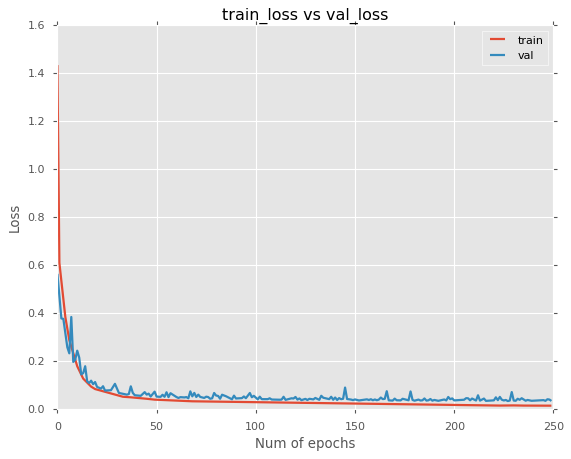

**c) Repita el paso anterior, utilizado ’ReLU’ como función de activación y compare con lo obtenido en b). **

In [ ]:
model2 = Sequential()
model2.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation="relu"))
model2.add(Dense(1, kernel_initializer='uniform',activation="linear"))
model2.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #, metrics=['accuracy']

history = model2.fit(xTrainScaled.values,
                    yTrain,
                    epochs=numEpochs,
                    verbose=1,
                    validation_data=(xValScaled.values, yVal), 
                    callbacks=[TestCallback((xTestScaled.values, yTest))])

In [ ]:
test_loss[-1] = model2.evaluate(xTestScaled.values, yTest, verbose=0)
train_loss = history.history['loss']
xc = range(numEpochs)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

> c) Repita el paso anterior, utilizado ’**ReLU**’ como función de activación y compare con lo obtenido en b).  

```python
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
#%%El gráfico el error cuadrático (MSE) 
import matplotlib.pyplot as plt
train_loss=history.history['loss']
val_loss=history.history['val_loss']
xc = range(250)
plt.figure(1, figsize=(8,6))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.ylabel('Loss')
plt.xlabel('Num of epochs')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])
#print (plt.style.available)
plt.style.use(['ggplot'])
#%%
```

>El gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento, para una red feedforward de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrenada la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación.

>**Faltan comentarios!!!**
>Modificando solo esas lineas,este codigo:
```python
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
```
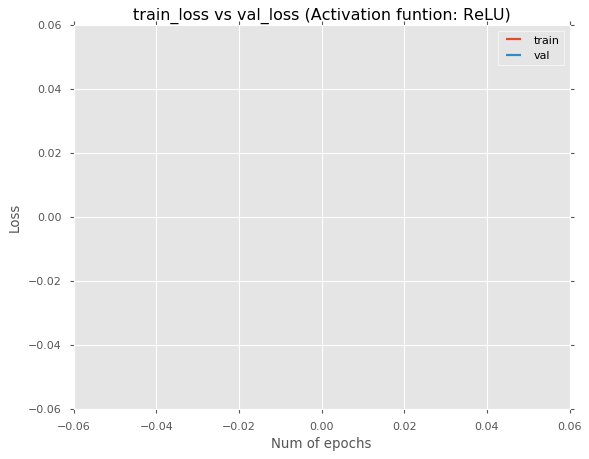


>Con este codigo:
```python
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="relu")) 
```
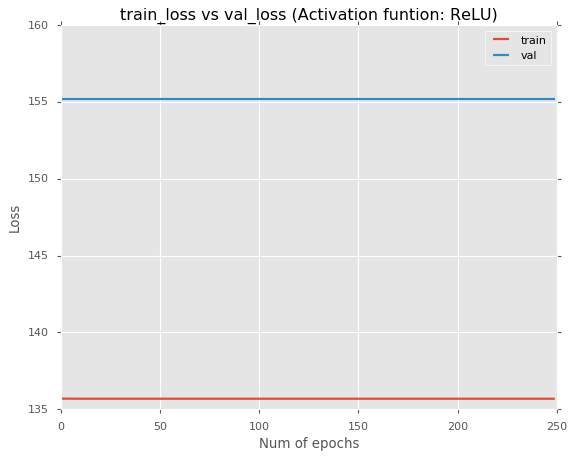

**d) Repita b) y c) variando la tasa de aprendizaje (*learning rate*) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.**

In [10]:
def iterateOverLearningRate(n_lr, activ):
    lear_rate = np.linspace(0,1,n_lr)
    histories = np.ndarray((20, ), object)

    for i in range (n_lr):
        model = Sequential()
        model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation=activ))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
        model.compile(optimizer=SGD(lear_rate[i]),loss='mean_squared_error')
        histories[i] = model.fit(xTrainScaled.values,
                        yTrain,
                        epochs=250,
                        verbose=1,
                        validation_data=(xValScaled.values, yVal), 
                        callbacks=[TestCallback((xTestScaled.values, yTest))])
    return histories

Primero, variamos la tasa de aprendizaje del metodo en b)

In [11]:
histories = iterateOverLearningRate(20, "sigmoid")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 470us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 2/250
9745/9745 [==============================] - 4s 428us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 3/250
9745/9745 [==============================] - 4s 360us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 4/250
9745/9745 [==============================] - 4s 381us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 5/250
9745/9745 [==============================] - 4s 376us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 6/250
9745/9745 [==============================] - 5s 521us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 7/250
9745/9745 [==============================] - 10s 1ms/step - loss: 134.3590 - val_l

9745/9745 [==============================] - 12s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 59/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 60/250
9745/9745 [==============================] - 12s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 61/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 62/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 63/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 64/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 65/250

9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227- ETA: 0s - loss: 134.34

Testing loss: 119.67663852220487
Epoch 116/250
9745/9745 [==============================] - 10s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 117/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 118/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 119/250
9745/9745 [==============================] - 12s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 120/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 121/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 1


Testing loss: 119.67663852220487
Epoch 172/250
9745/9745 [==============================] - 7s 740us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 173/250
9745/9745 [==============================] - 8s 832us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 174/250
9745/9745 [==============================] - 7s 767us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 175/250
9745/9745 [==============================] - 8s 831us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 176/250
9745/9745 [==============================] - 8s 852us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 177/250
9745/9745 [==============================] - 7s 712us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 178/250
9745/9745 [==============================] - 8s 805us/step - loss: 134.3590 - val_

9745/9745 [==============================] - 10s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 229/250
9745/9745 [==============================] - 15s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 230/250
9745/9745 [==============================] - 17s 2ms/step - loss: 134.3590 - val_loss: 153.7227.29

Testing loss: 119.67663852220487
Epoch 231/250
9745/9745 [==============================] - 14s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 232/250
9745/9745 [==============================] - 12s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 233/250
9745/9745 [==============================] - 13s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 234/250
9745/9745 [==============================] - 14s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epo

9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 43/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 44/250
9745/9745 [==============================] - 14s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 45/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 46/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 47/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 48/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 49/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 50/250
9745/9745 [==============================] - 11s 1ms/ste

9745/9745 [==============================] - 8s 847us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 112/250
9745/9745 [==============================] - 9s 907us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 113/250
9745/9745 [==============================] - 9s 900us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 114/250
9745/9745 [==============================] - 9s 920us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 8s 846us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 9s 881us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 9s 877us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 8s 840us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 354us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 180/250
9745/9745 [==============================] - 4s 361us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 181/250
9745/9745 [==============================] - 4s 403us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 182/250
9745/9745 [==============================] - 3s 351us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 183/250
9745/9745 [==============================] - 3s 325us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 184/250
9745/9745 [==============================] - 3s 322us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 3s 320us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 368us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 248/250
9745/9745 [==============================] - 4s 362us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 249/250
9745/9745 [==============================] - 3s 326us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 250/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 466us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 4s 415us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 4s 404us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 299us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
97

9745/9745 [==============================] - 4s 375us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 66/250
9745/9745 [==============================] - 4s 399us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 67/250
9745/9745 [==============================] - 3s 341us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 68/250
9745/9745 [==============================] - 4s 362us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 69/250
9745/9745 [==============================] - 4s 364us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 70/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 4s 422us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 5s 475us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 5s 


Testing loss: nan
Epoch 134/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 135/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 136/250
9745/9745 [==============================] - 4s 361us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 137/250
9745/9745 [==============================] - 4s 441us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 4s 398us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 4s 366us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/97

9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 203/250
9745/9745 [==============================] - 4s 437us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 204/250
9745/9745 [==============================] - 3s 349us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 205/250
9745/9745 [==============================] - 4s 384us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 4s 374us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 3s 351us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 4s 367us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 3s 321us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 406us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 21/250
9745/9745 [==============================] - 3s 352us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 22/250
9745/9745 [==============================] - 4s 368us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 23/250
9745/9745 [==============================] - 4s 406us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 24/250
9745/9745 [==============================] - 3s 311us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 25/250
9745/9745 [==============================] - 3s 341us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 26/250
9745/9745 [==============================] - 4s 408us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 27/250
9745/9745 [==============================] - 3s 323us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 28/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 3s 317us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 90/250
9745/9745 [==============================] - 3s 324us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 91/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 92/250
9745/9745 [==============================] - 3s 335us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 3s 319us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 369us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 3s 321us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 3s 318us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 356us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 158/250
9745/9745 [==============================] - 3s 357us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 159/250
9745/9745 [==============================] - 3s 325us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 160/250
9745/9745 [==============================] - 4s 380us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 161/250
9745/9745 [==============================] - 6s 567us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 162/250
9745/9745 [==============================] - 5s 506us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 163/250
9745/9745 [==============================] - 5s 521us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 164/250
9745/9745 [==============================] - 5s 512us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 165/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 226/250
9745/9745 [==============================] - 4s 428us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 227/250
9745/9745 [==============================] - 4s 428us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 228/250
9745/9745 [==============================] - 4s 388us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 4s 395us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 5s 521us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 6s 587us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 4s 451us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 353us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 44/250
9745/9745 [==============================] - 4s 362us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 45/250
9745/9745 [==============================] - 4s 374us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 46/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 47/250
9745/9745 [==============================] - 4s 401us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 48/250
9745/9745 [==============================] - 5s 467us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 49/250
9745/9745 [==============================] - 4s 365us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 50/250
9745/9745 [==============================] - 4s 368us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 51/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 5s 469us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 113/250
9745/9745 [==============================] - 5s 488us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 114/250
9745/9745 [==============================] - 5s 501us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 5s 501us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 5s 512us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 5s 470us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 5s 474us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 5s 486us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [=============================

9745/9745 [==============================] - 5s 481us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 181/250
9745/9745 [==============================] - 5s 498us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 182/250
9745/9745 [==============================] - 5s 518us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 183/250
9745/9745 [==============================] - 5s 477us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 184/250
9745/9745 [==============================] - 5s 476us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 5s 471us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 5s 503us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 5s 490us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [=============================

9745/9745 [==============================] - 5s 494us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 249/250
9745/9745 [==============================] - 5s 529us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 250/250
9745/9745 [==============================] - 5s 519us/step - loss: nan - val_loss: nan

Testing loss: nan
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 530us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 5s 462us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 5s 500us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 5s 516us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 5s 466us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745

9745/9745 [==============================] - 5s 483us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 67/250
9745/9745 [==============================] - 5s 496us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 68/250
9745/9745 [==============================] - 5s 516us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 69/250
9745/9745 [==============================] - 5s 496us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 70/250
9745/9745 [==============================] - 5s 485us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 5s 508us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 5s 475us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 5s 503us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 74/250
9745/9745 [==============================] - 5s 


Testing loss: nan
Epoch 135/250
9745/9745 [==============================] - 5s 543us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 136/250
9745/9745 [==============================] - 5s 523us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 137/250
9745/9745 [==============================] - 5s 557us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 5s 549us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 5s 561us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 5s 531us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 4s 447us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 3s 325us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/97

9745/9745 [==============================] - 3s 316us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 204/250
9745/9745 [==============================] - 3s 303us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 205/250
9745/9745 [==============================] - 3s 350us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 3s 309us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 3s 349us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 4s 385us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 3s 314us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 382us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 22/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 23/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 24/250
9745/9745 [==============================] - 4s 417us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 25/250
9745/9745 [==============================] - 4s 377us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 26/250
9745/9745 [==============================] - 4s 380us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 27/250
9745/9745 [==============================] - 3s 343us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 28/250
9745/9745 [==============================] - 4s 393us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 29/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 91/250
9745/9745 [==============================] - 3s 307us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 92/250
9745/9745 [==============================] - 3s 294us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 3s 330us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 372us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 3s 352us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 3s 348us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 4s 365us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 159/250
9745/9745 [==============================] - 4s 371us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 160/250
9745/9745 [==============================] - 3s 329us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 161/250
9745/9745 [==============================] - 4s 375us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 162/250
9745/9745 [==============================] - 4s 368us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 163/250
9745/9745 [==============================] - 4s 362us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 291us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 359us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 166/250
9745/9745 [=============================

9745/9745 [==============================] - 7s 758us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 227/250
9745/9745 [==============================] - 7s 701us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 228/250
9745/9745 [==============================] - 7s 727us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 7s 722us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 7s 734us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 7s 769us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 7s 728us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 7s 735us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [=============================

9745/9745 [==============================] - 7s 738us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 45/250
9745/9745 [==============================] - 7s 737us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 46/250
9745/9745 [==============================] - 8s 771us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 47/250
9745/9745 [==============================] - 7s 700us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 48/250
9745/9745 [==============================] - 7s 709us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 49/250
9745/9745 [==============================] - 7s 710us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 50/250
9745/9745 [==============================] - 7s 760us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 51/250
9745/9745 [==============================] - 7s 695us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 52/250
9745/9745 [==============================] - 7s 

9745/9745 [==============================] - 7s 675us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 114/250
9745/9745 [==============================] - 7s 718us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 8s 786us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 

9745/9745 [==============================] - 8s 869us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 182/250
9745/9745 [==============================] - 8s 793us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 183/250
9745/9745 [==============================] - 8s 863us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 184/250
9745/9745 [==============================] - 8s 849us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 8s 859us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 8s 866us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 13s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================]

9745/9745 [==============================] - 8s 857us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 250/250
9745/9745 [==============================] - 9s 923us/step - loss: nan - val_loss: nan

Testing loss: nan
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 9s 949us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 8s 870us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 9s 881us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 8s 853us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 8s 851us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 9s 879us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9


Testing loss: nan
Epoch 68/250
9745/9745 [==============================] - 8s 776us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 69/250
9745/9745 [==============================] - 7s 760us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 70/250
9745/9745 [==============================] - 8s 787us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 7s 742us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 9s 903us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 74/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 75/250
9745/9745 [==============================] - 13s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 76/250
9745/9745 [========

9745/9745 [==============================] - 3s 340us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 137/250
9745/9745 [==============================] - 3s 325us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 3s 279us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 4s 391us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 4s 440us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 3s 359us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 3s 328us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/9745 [==============================] - 4s 405us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 144/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 288us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 205/250
9745/9745 [==============================] - 3s 332us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 3s 327us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 3s 353us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 4s 366us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 4s 372us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 3s 331us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 302us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 23/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 24/250
9745/9745 [==============================] - 3s 359us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 25/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 26/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 27/250
9745/9745 [==============================] - 4s 372us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 28/250
9745/9745 [==============================] - 3s 358us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 29/250
9745/9745 [==============================] - 3s 343us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 30/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 4s 361us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 92/250
9745/9745 [==============================] - 4s 381us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 4s 379us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 3s 343us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 3s 337us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 4s 415us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 388us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 414us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 3s 308us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 160/250
9745/9745 [==============================] - 3s 322us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 161/250
9745/9745 [==============================] - 3s 357us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 162/250
9745/9745 [==============================] - 3s 330us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 163/250
9745/9745 [==============================] - 4s 379us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 292us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 165/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 324us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 167/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 399us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 228/250
9745/9745 [==============================] - 4s 411us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 3s 334us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 3s 351us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 3s 334us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 4s 423us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 3s 340us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [=============================

9745/9745 [==============================] - 5s 492us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 46/250
9745/9745 [==============================] - 5s 492us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 47/250
9745/9745 [==============================] - 6s 569us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 48/250
9745/9745 [==============================] - 5s 518us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 49/250
9745/9745 [==============================] - 5s 523us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 50/250
9745/9745 [==============================] - 4s 434us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 51/250
9745/9745 [==============================] - 4s 457us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 52/250
9745/9745 [==============================] - 4s 391us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 53/250
9745/9745 [==============================] - 4s 


Testing loss: nan
Epoch 114/250
9745/9745 [==============================] - 4s 415us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 4s 451us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 4s 407us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 4s 432us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 4s 375us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 4s 437us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 5s 497us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 4s 407us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/97

9745/9745 [==============================] - 4s 369us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 183/250
9745/9745 [==============================] - 4s 419us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 184/250
9745/9745 [==============================] - 4s 404us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 4s 401us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 3s 359us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 4s 391us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 4s 372us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 190/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 351us/step - loss: nan - val_loss: nan

Testing loss: nan
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 431us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 4s 359us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 4s 361us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 356us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 327us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 4s 367us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 289us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 8/250
9745/974

9745/9745 [==============================] - 4s 459us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 69/250
9745/9745 [==============================] - 4s 399us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 70/250
9745/9745 [==============================] - 4s 399us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 5s 466us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 4s 414us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 4s 422us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 74/250
9745/9745 [==============================] - 5s 532us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 75/250
9745/9745 [==============================] - 4s 417us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 76/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 7s 678us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 137/250
9745/9745 [==============================] - 7s 668us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 6s 663us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 6s 658us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 6s 643us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 7s 701us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 7s 675us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/9745 [==============================] - 7s 670us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 144/250
9745/9745 [=============================

9745/9745 [==============================] - 7s 701us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 205/250
9745/9745 [==============================] - 7s 756us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 6s 629us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 7s 708us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 7s 711us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 6s 662us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 7s 708us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 7s 711us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [=============================

9745/9745 [==============================] - 6s 664us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 23/250
9745/9745 [==============================] - 6s 660us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 24/250
9745/9745 [==============================] - 7s 676us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 25/250
9745/9745 [==============================] - 6s 650us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 26/250
9745/9745 [==============================] - 7s 694us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 27/250
9745/9745 [==============================] - 7s 697us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 28/250
9745/9745 [==============================] - 7s 674us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 29/250
9745/9745 [==============================] - 7s 673us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 30/250
9745/9745 [==============================] - 6s 

9745/9745 [==============================] - 4s 429us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 92/250
9745/9745 [==============================] - 4s 385us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 4s 380us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 4s 401us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 405us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 422us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 4s 430us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 160/250
9745/9745 [==============================] - 4s 390us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 161/250
9745/9745 [==============================] - 5s 510us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 162/250
9745/9745 [==============================] - 4s 391us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 163/250
9745/9745 [==============================] - 4s 429us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 164/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 165/250
9745/9745 [==============================] - 4s 381us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 166/250
9745/9745 [==============================] - 5s 488us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 167/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 228/250
9745/9745 [==============================] - 4s 411us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 4s 416us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 4s 419us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 3s 346us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 4s 404us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 4s 419us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 343us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 46/250
9745/9745 [==============================] - 3s 358us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 47/250
9745/9745 [==============================] - 4s 386us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 48/250
9745/9745 [==============================] - 3s 350us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 49/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 50/250
9745/9745 [==============================] - 4s 369us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 51/250
9745/9745 [==============================] - 4s 389us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 52/250
9745/9745 [==============================] - 3s 338us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 53/250
9745/9745 [==============================] - 4s 


Testing loss: nan
Epoch 114/250
9745/9745 [==============================] - 4s 413us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 3s 358us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 4s 371us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 3s 351us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 3s 353us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/97

9745/9745 [==============================] - 4s 396us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 183/250
9745/9745 [==============================] - 4s 456us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 184/250
9745/9745 [==============================] - 4s 382us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 3s 330us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 3s 320us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 3s 301us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 3s 306us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================] - 3s 354us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 190/250
9745/9745 [=============================

9745/9745 [==============================] - 9s 947us/step - loss: nan - val_loss: nan

Testing loss: nan
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 9s 969us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 9s 887us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 9s 925us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 8/250
9745/9745 [=


Testing loss: nan
Epoch 69/250
9745/9745 [==============================] - 9s 875us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 70/250
9745/9745 [==============================] - 9s 972us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 9s 878us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 9s 902us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 9s 874us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 74/250
9745/9745 [==============================] - 9s 925us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 75/250
9745/9745 [==============================] - 8s 845us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 76/250
9745/9745 [==============================] - 9s 875us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 77/250
9745/9745 [=====

9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 9s 942us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 9s 932us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/9745 [==============================] - 9s 907us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 144/250
9745/9745 [==============================] - 9s 911us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 145/250
9745/9745 [==============================] -

9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [==============================] - 10s 995us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 213/250
9745/9745 [==============================] - 9

9745/9745 [==============================] - 8s 791us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 24/250
9745/9745 [==============================] - 8s 832us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 25/250
9745/9745 [==============================] - 8s 801us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 26/250
9745/9745 [==============================] - 8s 806us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 27/250
9745/9745 [==============================] - 8s 837us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 28/250
9745/9745 [==============================] - 8s 824us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 29/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 30/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 31/250
9745/9745 [==============================] - 10s 9

9745/9745 [==============================] - 3s 322us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 3s 327us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 3s 337us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 3s 317us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 3s 310us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 435us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 4s 390us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 100/250
9745/9745 [==============================] - 3s

9745/9745 [==============================] - 3s 343us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 161/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 162/250
9745/9745 [==============================] - 4s 360us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 163/250
9745/9745 [==============================] - 3s 332us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 164/250
9745/9745 [==============================] - 4s 381us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 339us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 167/250
9745/9745 [==============================] - 4s 409us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 168/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 332us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 4s 400us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 4s 374us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 3s 324us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 4s 424us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 4s 393us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 4s 403us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 236/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 340us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 47/250
9745/9745 [==============================] - 3s 328us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 48/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 49/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 50/250
9745/9745 [==============================] - 4s 378us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 51/250
9745/9745 [==============================] - 4s 391us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 52/250
9745/9745 [==============================] - 3s 333us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 53/250
9745/9745 [==============================] - 3s 304us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 54/250
9745/9745 [==============================] - 3s 


Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 4s 406us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 3s 346us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 3s 328us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 3s 352us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 4s 420us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/9745 [==============================] - 3s 329us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 123/250
9745/97

9745/9745 [==============================] - 4s 377us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 184/250
9745/9745 [==============================] - 3s 358us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 4s 365us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 4s 372us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 4s 375us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================] - 3s 329us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 190/250
9745/9745 [==============================] - 4s 447us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 191/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 393us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 4s 375us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 306us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 355us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 4s 364us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9745 [==============================] - 4s 410us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 8/250
9745/9745 [==============================] - 4s 385us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 9/250
9745/9745 [==============================] - 4s 371us/st

9745/9745 [==============================] - 4s 428us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 4s 381us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 3s 341us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 3s 331us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 74/250
9745/9745 [==============================] - 3s 303us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 75/250
9745/9745 [==============================] - 3s 324us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 76/250
9745/9745 [==============================] - 3s 310us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 77/250
9745/9745 [==============================] - 3s 333us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 78/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 3s 317us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 4s 365us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 4s 390us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 4s 427us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 4s 432us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/9745 [==============================] - 3s 356us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 144/250
9745/9745 [==============================] - 3s 327us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 145/250
9745/9745 [==============================] - 3s 357us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 146/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 4s 365us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 3s 330us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 4s 398us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 4s 362us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [==============================] - 3s 303us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 213/250
9745/9745 [==============================] - 4s 406us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 214/250
9745/9745 [=============================

9745/9745 [==============================] - 5s 480us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 25/250
9745/9745 [==============================] - 4s 421us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 26/250
9745/9745 [==============================] - 3s 341us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 27/250
9745/9745 [==============================] - 4s 438us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 28/250
9745/9745 [==============================] - 4s 369us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 29/250
9745/9745 [==============================] - 4s 360us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 30/250
9745/9745 [==============================] - 4s 390us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 31/250
9745/9745 [==============================] - 4s 414us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 32/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 4s 403us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 389us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 4s 411us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 3s 310us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 3s 348us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 3s 303us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 100/250
9745/9745 [==============================] - 4s 368us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 101/250
9745/9745 [==============================] - 3

9745/9745 [==============================] - 4s 419us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 162/250
9745/9745 [==============================] - 4s 383us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 163/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 164/250
9745/9745 [==============================] - 4s 387us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 165/250
9745/9745 [==============================] - 4s 388us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 166/250
9745/9745 [==============================] - 4s 367us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 167/250
9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 168/250
9745/9745 [==============================] - 4s 364us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 169/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 307us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 3s 340us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 4s 398us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 4s 378us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 3s 302us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [==============================] - 4s 390us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 236/250
9745/9745 [==============================] - 4s 420us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 237/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 48/250
9745/9745 [==============================] - 4s 360us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 49/250
9745/9745 [==============================] - 3s 353us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 50/250
9745/9745 [==============================] - 3s 329us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 51/250
9745/9745 [==============================] - 3s 333us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 52/250
9745/9745 [==============================] - 4s 393us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 53/250
9745/9745 [==============================] - 3s 325us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 54/250
9745/9745 [==============================] - 3s 352us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 55/250
9745/9745 [==============================] - 3s 


Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 4s 390us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 3s 334us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 4s 409us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 4s 384us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 4s 361us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/9745 [==============================] - 4s 371us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 123/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 124/250
9745/97

9745/9745 [==============================] - 3s 326us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 3s 308us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 4s 410us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 3s 352us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 3s 355us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================] - 3s 337us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 190/250
9745/9745 [==============================] - 3s 329us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 191/250
9745/9745 [==============================] - 3s 350us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 192/250
9745/9745 [=============================

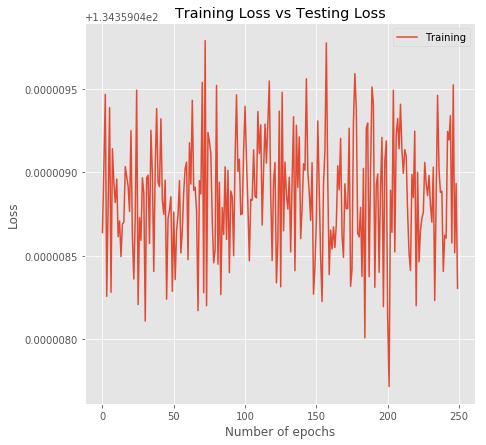

In [47]:
#El último valor del testing siempre venía erroneo, por lo que se reemplaza con el correcto
#evaluando el modelo con 250 epochs (modelo final)

#test_loss[-1] =model.evaluate(xTestScaled.values, yTest, verbose=0)
train_loss = np.ndarray((20, ), list)
xc = range(numEpochs)
#plt.subplot(131)
train_loss[0]=   histories[0].history['loss']
plt.figure(1, figsize=(7, 7))
plt.plot(xc,train_loss[0])
#plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
plt.style.use(['ggplot'])



Ahora variamos la tasa de aprendizaje del metodo en c)

In [ ]:
histories = iterateOverLearningRate(20, "relu")

**e) Entrene los modelos considerados en b) y c) usando *progressive decay*. Compare y comente.**

In [20]:
def iterateOverDecay(n_decay, activ):
    lear_decay = np.logspace(-6,0,n_decay)
    histories = np.ndarray((n_decay, ), object)
    for i in range (n_decay):
        sgd = SGD(0.2, lear_decay[i])
        model = Sequential()
        model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation=activ))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
        model.compile(optimizer= sgd,loss='mean_squared_error') #, metrics=['accuracy'] 
        histories[i] = model.fit(xTrainScaled.values,
                        yTrain,
                        epochs=20,
                        verbose=1,
                        validation_data=(xValScaled.values, yVal), 
                        callbacks=[TestCallback((xTestScaled.values, yTest))])

Varios el progressive decay para el metodo en b)

In [21]:
histories = iterateOverDecay(10, "sigmoid")

Train on 9745 samples, validate on 4060 samples
Epoch 1/20
9440/9745 [============================>.] - ETA: 0s - loss: nan
Testing loss: nan
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 2/20
9376/9745 [===========================>..] - ETA: 0s - loss: nan
Testing loss: nan
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 3/20
9408/9745 [===========================>..] - ETA: 0s - loss: nan
Testing loss: nan
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 4/20
9696/9745 [============================>.] - ETA: 0s - loss: nan
Testing loss: nan
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 5/20
9376/9745 [===========================>..] - ETA: 0s - loss: nan
Testing loss: nan
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 6/20
9440/9745 [============================>.] - ETA: 0s - loss: nan
Testing loss: nan
9745/974

KeyboardInterrupt: 

In [22]:
histories = iterateOverDecay(10, "relu")

Train on 9745 samples, validate on 4060 samples
Epoch 1/20
9696/9745 [============================>.] - ETA: 0s - loss: nan
Testing loss: nan
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 2/20
9696/9745 [============================>.] - ETA: 0s - loss: nan
Testing loss: nan
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 3/20
9664/9745 [============================>.] - ETA: 0s - loss: nan
Testing loss: nan
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 4/20
9376/9745 [===========================>..] - ETA: 0s - loss: nan
Testing loss: nan
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 5/20
9504/9745 [============================>.] - ETA: 0s - loss: nan
Testing loss: nan
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 6/20
9568/9745 [============================>.] - ETA: 0s - loss: nan
Testing loss: nan
9745/974

KeyboardInterrupt: 